## Анализ мест для прогулок в Спб

### Результаты опроса

In [7]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)
import random
tf_to_bool = lambda x: True if x == '1' else False
tf_to_bool2 = lambda x: True if x== 't' else False

In [2]:
users = pd.read_csv("data/20180406_users.csv", converters={'citizen': tf_to_bool2, 'green':tf_to_bool2, 'silence':tf_to_bool2, 'interesting':tf_to_bool2}, sep=';')
users = users.rename(columns={'interesting':'photos','interesting.1':'interesting', 'archi':'architecture'})

In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 19 columns):
id                  58 non-null int64
name                47 non-null object
sex                 58 non-null int64
ages                58 non-null int64
citizen             58 non-null bool
walk_freq           58 non-null int64
green               58 non-null bool
silence             58 non-null bool
photos              58 non-null bool
other               22 non-null object
architecture        58 non-null bool
cleanness           58 non-null bool
water               58 non-null bool
open space          58 non-null bool
beauty              58 non-null bool
interesting         58 non-null bool
no tourists         58 non-null bool
new places          58 non-null bool
city environment    58 non-null bool
dtypes: bool(13), int64(4), object(2)
memory usage: 3.5+ KB


In [4]:
users.head(5)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>id</th>
      <th>name</th>
      <th>sex</th>
      <th>ages</th>
      <th>citizen</th>
      <th>walk_freq</th>
      <th>green</th>
      <th>silence</th>
      <th>photos</th>
      <th>other</th>
      <th>architecture</th>
      <th>cleanness</th>
      <th>water</th>
      <th>open space</th>
      <th>beauty</th>
      <th>interesting</th>
      <th>no tourists</th>
      <th>new places</th>
      <th>city environment</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>57</td>
      <td>Родион Корж</td>
      <td>0</td>
      <td>23</td>
      <td>True</td>
      <td>3</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>Красивая архитектура, набережная, большие откр...</td>
      <td>True</td>
      <td>False</td>
      <td>True</td>
      <td>True</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
    </tr>
    <tr>
      <th>1</th>
      <td>58</td>
      <td>Величко Алексей</td>
      <td>0</td>
      <td>28</td>
      <td>False</td>
      <td>3</td>
      <td>True</td>
      <td>True</td>
      <td>False</td>
      <td>NaN</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
    </tr>
    <tr>
      <th>2</th>
      <td>59</td>
      <td>Спиридонова Айсена</td>
      <td>1</td>
      <td>25</td>
      <td>False</td>
      <td>4</td>
      <td>True</td>
      <td>False</td>
      <td>True</td>
      <td>NaN</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
    </tr>
    <tr>
      <th>3</th>
      <td>60</td>
      <td>NaN</td>
      <td>1</td>
      <td>18</td>
      <td>True</td>
      <td>4</td>
      <td>False</td>
      <td>True</td>
      <td>False</td>
      <td>NaN</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
    </tr>
    <tr>
      <th>4</th>
      <td>61</td>
      <td>Валерия АБрамова</td>
      <td>1</td>
      <td>19</td>
      <td>False</td>
      <td>3</td>
      <td>True</td>
      <td>True</td>
      <td>True</td>
      <td>NaN</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
    </tr>
  </tbody>
</table>
</div>

In [5]:
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


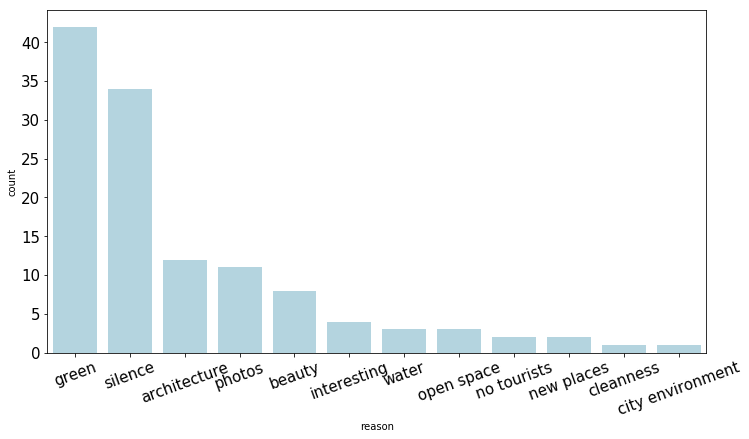

In [7]:
reasons = users.drop(['id','name','sex','ages','citizen','walk_freq','other'],axis=1)
reasons_count = reasons.applymap(lambda x: int(x)).sum()
df = reasons_count.to_frame()
df.columns = ['count']
df['reason'] = df.index
plt.figure(figsize=cm2inch(30, 16))

pl = sns.barplot(x='reason', y='count', data=df.sort_values(by=['count'],ascending=False),color='lightblue')
plt.xticks(rotation=20,size=15)
plt.yticks(size=15)
# plt.show()
# plt.savefig('C:\\projects\\lba\\thesis\\imgs\\reasons2.png', dpi=150)

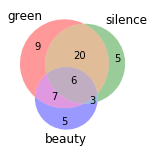

In [8]:
from matplotlib_venn import venn2,venn3

users['beauty'] = 0
users.loc[(users.beauty) | (users.architecture) | (users.photos), 'beauty'] = 1

green_only = users[(users.green) & (users.silence == False) &(users.beauty == False)].__len__()
silence_only = users[(users.silence)&(users.green == False) & (users.beauty == False)].__len__()
photos_only = users[(users.beauty) & (users.green == False) & (users.silence == False)].__len__()
green_and_silence = users[(users.green ) & (users.silence ) & (users.beauty == False)].__len__()
green_and_photos = users[(users.green) & (users.beauty) & (users.silence == False)].__len__()
silence_and_photos = users[(users.silence)&(users.beauty) & (users.green == False)].__len__()
silince_photos_green = users[(users.silence)&(users.beauty)&(users.green)].__len__()
plt.figure(figsize=cm2inch(6, 6))
venn3(subsets=(green_only,silence_only,green_and_silence,
      photos_only,green_and_photos,silence_and_photos,
      silince_photos_green),set_labels=('green','silence','beauty'))
#plt.savefig('C:\\projects\\lba\\thesis\\imgs\\venn_sgp.png', dpi=150)
# venn3(subsets=(6,1,1,2,1,2,1))
# silince_photos_green

In [9]:
users.loc[users.ages < 21, 'ages_cat'] = '< 21'
users.loc[(users.ages >= 21) & (users.ages < 24), 'ages_cat'] = '21-24'
users.loc[(users.ages >= 24) & (users.ages < 27), 'ages_cat'] = '24-27'
users.loc[(users.ages >= 27) & (users.ages < 30), 'ages_cat'] = '27-30'
users.loc[(users.ages >= 30) & (users.ages < 35), 'ages_cat'] = '30-35'
users.loc[(users.ages >= 35) & (users.ages < 45), 'ages_cat'] = '35-45'
users.loc[(users.ages >= 45), 'ages_cat'] = '> 45'
users.loc[users.sex == 1, 'who'] = 'female'
users.loc[users.sex == 0, 'who'] = 'male'

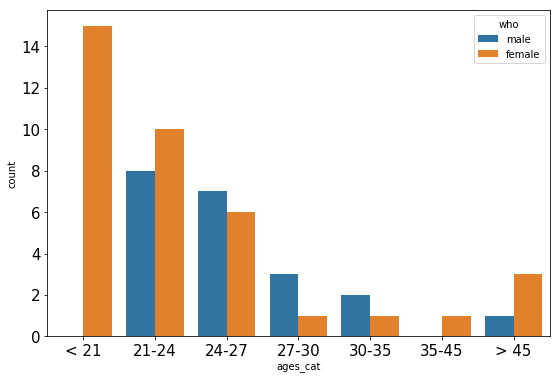

In [152]:
plt.figure(figsize=(9,6))
sns.countplot(x='ages_cat', hue='who', data=users,
              order=['< 21','21-24','24-27','27-30','30-35','35-45','> 45'])
plt.xticks(size=15)
plt.yticks(size=15)
#plt.savefig('C:\\projects\\lba\\thesis\\imgs\\resp_ages.png', dpi=300)

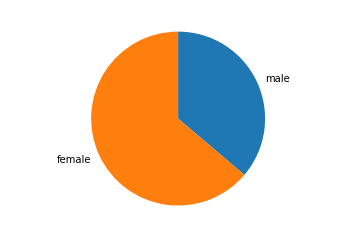

In [153]:
sums = users.sex.groupby(users.sex).count()
plt.axis('equal')
plt.pie(sums,labels=['male','female'], startangle=90, counterclock=False)
#plt.savefig('C:\\projects\\lba\\thesis\\imgs\\male_female_pie.png', dpi=300)

([<matplotlib.patches.Wedge at 0x2065bb73cc0>,
 [Text(1.04206,-0.352297,'no'), Text(-1.04206,0.352297,'yes')])

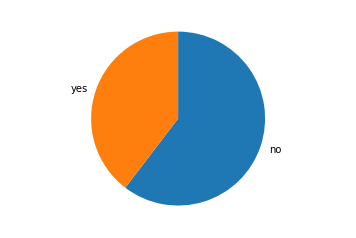

In [85]:
sums = users.citizen.groupby(users.citizen).count()
plt.axis('equal')
plt.pie(sums,labels=['no', 'yes'], startangle=90, counterclock=False)
# plt.savefig('C:\\projects\\lba\\thesis\\imgs\\male_female_pie.png', dpi=300)

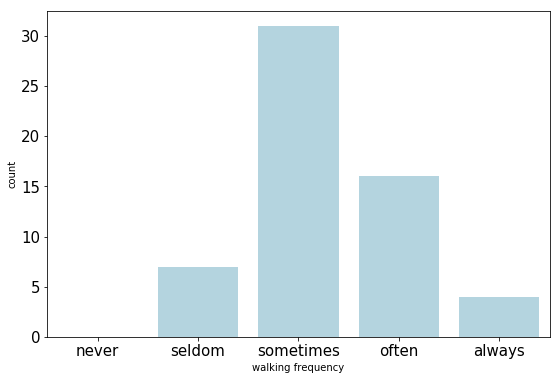

In [156]:
users.loc[users.walk_freq == 1, 'walking frequency'] = 'never'
users.loc[users.walk_freq == 2, 'walking frequency'] = 'seldom'
users.loc[users.walk_freq == 3, 'walking frequency'] = 'sometimes'
users.loc[users.walk_freq == 4, 'walking frequency'] = 'often'
users.loc[users.walk_freq == 5, 'walking frequency'] = 'always'
plt.figure(figsize=(9,6))
sns.countplot(x='walking frequency', data=users,color='lightblue',
              order=['never','seldom','sometimes','often','always'])

plt.xticks(size=15)
plt.yticks(size=15)
# plt.savefig('C:\\projects\\lba\\thesis\\imgs\\walking_freq.png', dpi=300)

### Модель
 Теперь переходим к самому интересному - построение модели.

In [2]:
filepath = 'data/footways_exp3.csv'
data = pd.read_csv(filepath,
                   converters={'dirty': tf_to_bool,'green':tf_to_bool,'water':tf_to_bool})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174291 entries, 0 to 174290
Data columns (total 15 columns):
noise_lvl           174291 non-null int64
archi_rev_before    174291 non-null int64
archi_rev_after     174291 non-null int64
archi_current       174291 non-null int64
archi_unknown       174291 non-null int64
archi_nohouses      174291 non-null int64
nusers              174291 non-null int64
water               174291 non-null bool
dirty               174291 non-null bool
green               174291 non-null bool
stats_median        66766 non-null float64
stats_count         66766 non-null float64
stats_mean          66766 non-null float64
stats_stdev         59698 non-null float64
id                  174291 non-null int64
dtypes: bool(3), float64(4), int64(8)
memory usage: 16.5 MB


In [3]:
data2 = data[data['stats_count'] > 0 ]
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66766 entries, 0 to 174290
Data columns (total 15 columns):
noise_lvl           66766 non-null int64
archi_rev_before    66766 non-null int64
archi_rev_after     66766 non-null int64
archi_current       66766 non-null int64
archi_unknown       66766 non-null int64
archi_nohouses      66766 non-null int64
nusers              66766 non-null int64
water               66766 non-null bool
dirty               66766 non-null bool
green               66766 non-null bool
stats_median        66766 non-null float64
stats_count         66766 non-null float64
stats_mean          66766 non-null float64
stats_stdev         59698 non-null float64
id                  66766 non-null int64
dtypes: bool(3), float64(4), int64(8)
memory usage: 6.8 MB


In [16]:
from scipy.stats import kruskal,wilcoxon
import random

noise_0 = random.sample(list(data2[data2['noise_lvl'] == 0]['stats_mean']), 1000)
noise_45 = random.sample(list(data2[data2['noise_lvl'] == 45]['stats_mean']), 1000)
noise_55 = random.sample(list(data2[data2['noise_lvl'] == 55]['stats_mean']), 1000)
noise_65 = random.sample(list(data2[data2['noise_lvl'] == 65]['stats_mean']), 1000)

kruskal(noise_0, noise_45, noise_55, noise_65)

KruskalResult(statistic=669.871280209682, pvalue=7.159494011685402e-145)

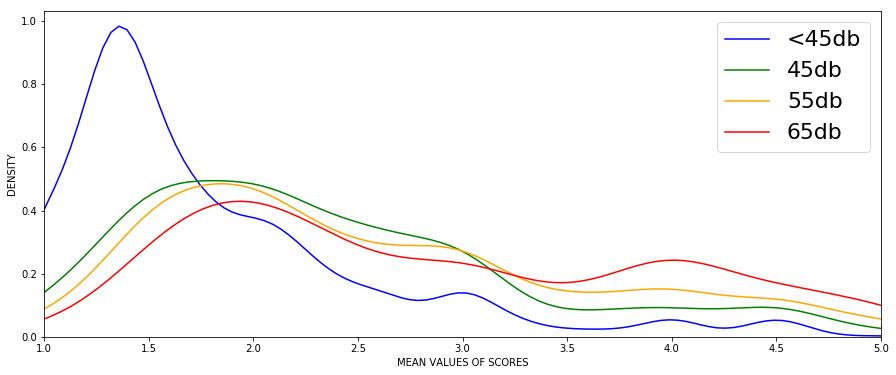

In [17]:
fig, ax = plt.subplots(figsize=(15,6))
# noise_0 = random.sample(list(data2[(data2['noise_lvl'] == 0) | (data2['noise_lvl'] == 45)]['stats_mean']), 10000)
# noise_all = random.sample(list(data2[(data2['noise_lvl'] == 55) | (data2['noise_lvl'] == 65)]['stats_mean']), 10000)
level = -1
labels = ['<45db', '45db','55db','65db']
colors = ['blue','green','orange','red']
for a in [noise_0, noise_45, noise_55,noise_65]:
    level+=1
    # a_log = np.log(a)
    sns.distplot(a, ax=ax,bins=30, kde=True,label='%s'%labels[level], hist=False,color=colors[level])
    # sns.kdeplot(a_log, ax=ax,shade=True, label='%d'%level)
ax.set_xlim([1, 5])
plt.xlabel('MEAN VALUES OF SCORES')
plt.ylabel('DENSITY')
plt.legend(fontsize=22)

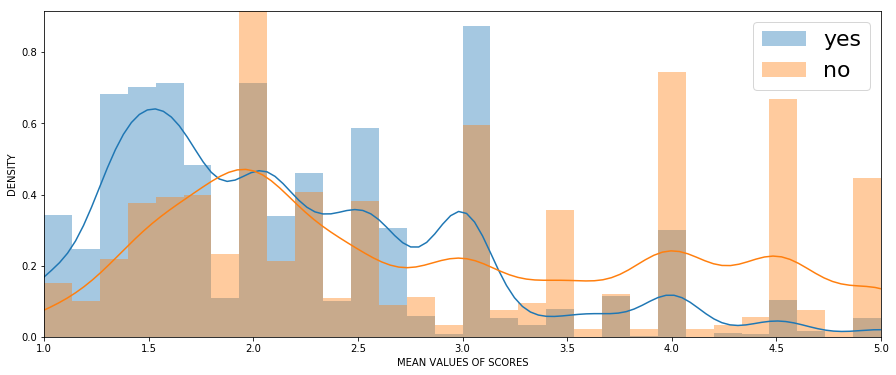

In [18]:
fig, ax = plt.subplots(figsize=(15,6))
green = random.sample(list(data2[data2['green'] == True]['stats_mean']), 10000)
notgreen = random.sample(list(data2[data2['green'] != True]['stats_mean']), 10000)
level = -1
labels = ['yes', 'no']
for a in [green, notgreen]:
    level+=1
    # a_log = np.log(a)
    sns.distplot(a, ax=ax,bins=30, kde=True, label='%s'%labels[level])
    # sns.kdeplot(a_log, ax=ax,shade=True, label='%d'%level)
ax.set_xlim([1, 5])
plt.xlabel('MEAN VALUES OF SCORES')
plt.ylabel('DENSITY')
plt.legend(fontsize=22)

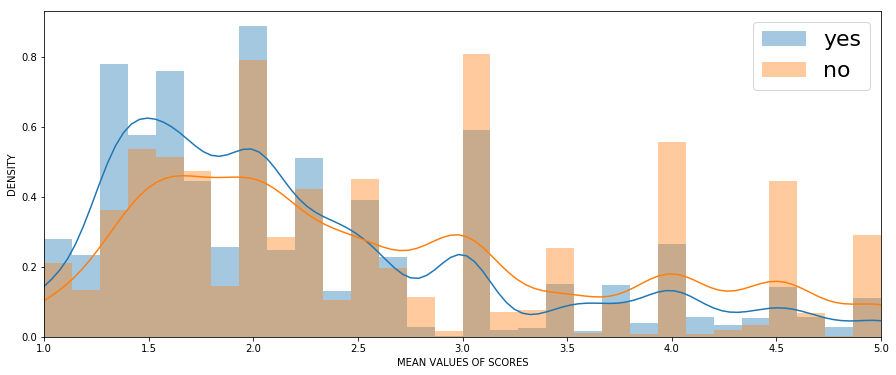

In [19]:
fig, ax = plt.subplots(figsize=(15,6))
yes = random.sample(list(data2[data2['water'] == True]['stats_mean']), 10000)
no = random.sample(list(data2[data2['water'] != True]['stats_mean']), 10000)
level = -1
labels = ['yes', 'no']
for a in [yes, no]:
    level+=1
    # a_log = np.log(a)
    sns.distplot(a, ax=ax,bins=30, kde=True, label='%s'%labels[level])
    # sns.kdeplot(a_log, ax=ax,shade=True, label='%d'%level)
ax.set_xlim([1, 5])
plt.xlabel('MEAN VALUES OF SCORES')
plt.ylabel('DENSITY')
plt.legend(fontsize=22)

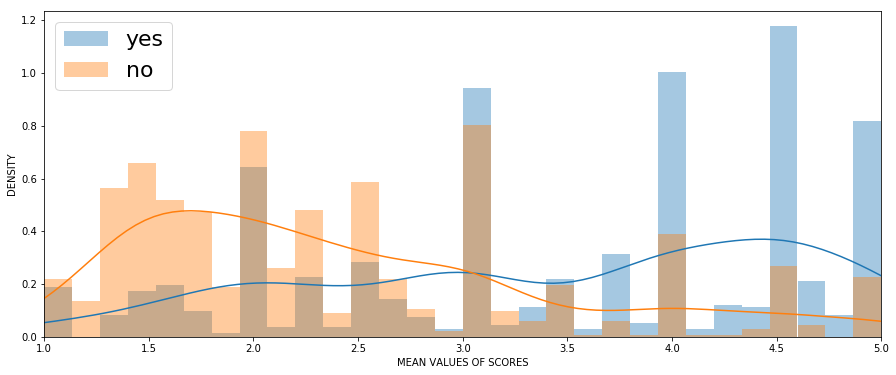

In [20]:
fig, ax = plt.subplots(figsize=(15,6))
yes = random.sample(list(data2[data2['dirty'] == True]['stats_mean']), 1000)
no = random.sample(list(data2[data2['dirty'] != True]['stats_mean']), 1000)
level = -1
labels = ['yes', 'no']
for a in [yes, no]:
    level+=1
    # a_log = np.log(a)
    sns.distplot(a, ax=ax,bins=30, kde=True, label='%s'%labels[level])
    # sns.kdeplot(a_log, ax=ax,shade=True, label='%d'%level)
ax.set_xlim([1, 5])
plt.xlabel('MEAN VALUES OF SCORES')
plt.ylabel('DENSITY')
plt.legend(fontsize=22)

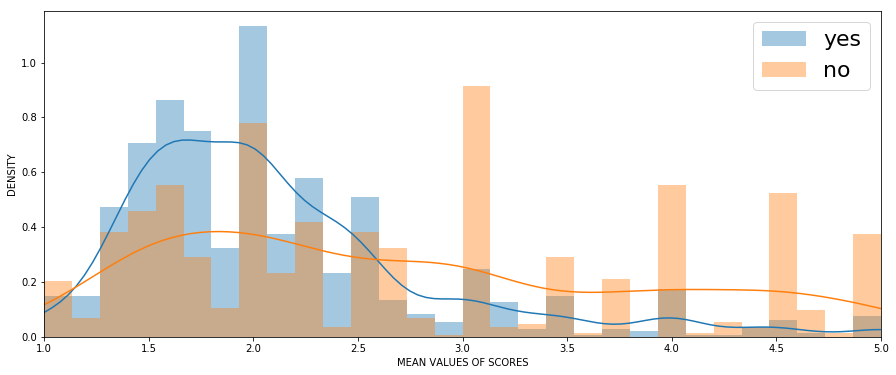

In [21]:
fig, ax = plt.subplots(figsize=(15,6))
yes = random.sample(list(data2[data2['archi_rev_before'] == True]['stats_mean']), 1000)
no = random.sample(list(data2[data2['archi_rev_before'] != True]['stats_mean']), 1000)
level = -1
labels = ['yes', 'no']
for a in [yes, no]:
    level+=1
    # a_log = np.log(a)
    sns.distplot(a, ax=ax,bins=30, kde=True, label='%s'%labels[level])
    # sns.kdeplot(a_log, ax=ax,shade=True, label='%d'%level)
ax.set_xlim([1, 5])
plt.xlabel('MEAN VALUES OF SCORES')
plt.ylabel('DENSITY')
plt.legend(fontsize=22)

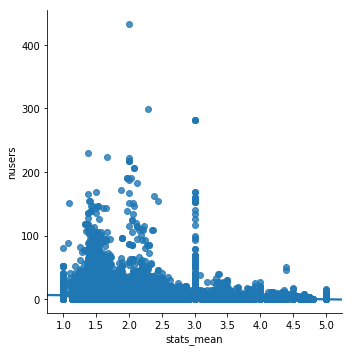

In [20]:
sns.lmplot(x="stats_mean",y="nusers",data=data2)

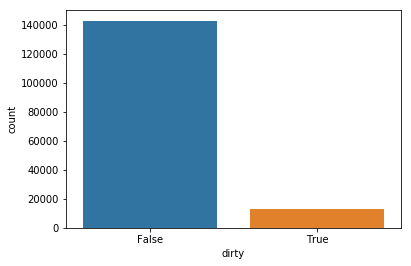

In [7]:
sns.countplot(x='dirty',data=data)

In [4]:

field = 'stats_mean'

# levels = [1, 2, 3, 4, 5]
# levels = [1, 2, 3.5, 5]
#levels = [1, 2.154, 3.455, 5]
#levels = [1,1.5,3,5]


levels = [1, 1.9, 3, 5]
#levels = [1, 2.9, 5]

for i in range(0,levels.__len__() - 1):
    if i == 0:
        data2.loc[(data2[field] >= levels[i])&(data2[field] <= levels[i+1]),'lvl'] = i+1
    else:
        data2.loc[(data2[field] > levels[i])&(data2[field] <= levels[i+1]),'lvl'] = i+1

C:\Users\sasfeat\Anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\sasfeat\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [12]:
import random
for feature in ['green','archi_rev_before','water','dirty']:
    
    yes = random.sample(list(data2[data2[feature] == True]['stats_mean']),1000)
    no = random.sample(list(data2[data2[feature] != True]['stats_mean']),1000)
    print(wilcoxon(x=yes,y=no,correction=True))

WilcoxonResult(statistic=184129.0, pvalue=9.320073232032187e-09)
WilcoxonResult(statistic=132616.5, pvalue=2.0652065314596648e-33)
WilcoxonResult(statistic=167936.0, pvalue=5.5387257165148844e-14)
WilcoxonResult(statistic=77270.0, pvalue=4.681843025255558e-71)


In [14]:
iswater = random.sample(list(data2[data2['water'] == True]['stats_mean']),1000)
notwater = random.sample(list(data2[data2['water'] != True]['stats_mean']),1000)
wilcoxon(x=iswater,y=notwater,correction=True)

WilcoxonResult(statistic=158870.5, pvalue=7.97620306020824e-19)

In [15]:
isdirty = random.sample(list(data2[data2['dirty'] == True]['stats_mean']),1000)
notdirty = random.sample(list(data2[data2['dirty'] != True]['stats_mean']),1000)
wilcoxon(x=isdirty,y=notdirty,correction=True)

WilcoxonResult(statistic=76105.0, pvalue=1.5195013852918256e-72)

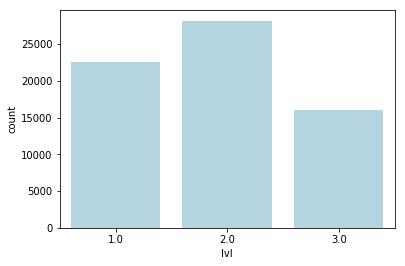

In [23]:
sns.countplot('lvl',data=data2, color='lightblue')

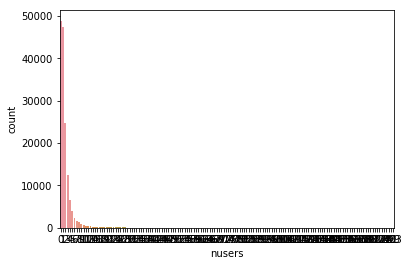

In [270]:
sns.countplot('nusers',data=data)

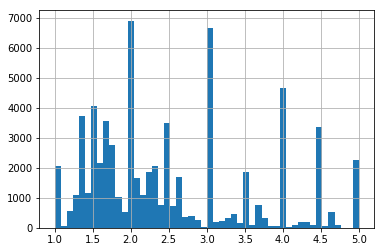

In [24]:
data2['stats_mean'].hist(bins=50)

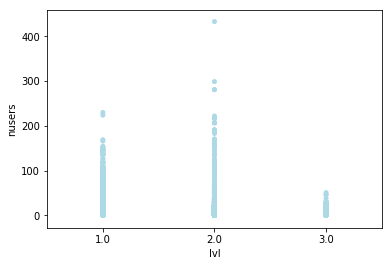

In [5]:
sns.stripplot(x='lvl',y='nusers',data=data2, color='lightblue')

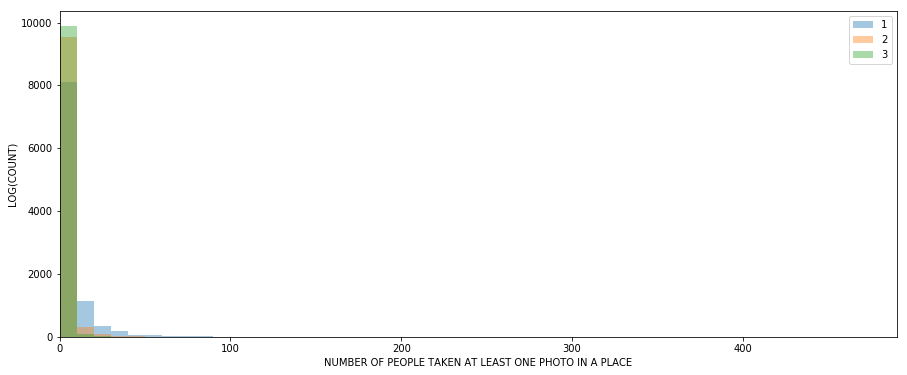

In [12]:
fig, ax = plt.subplots(figsize=(15,6))
best = random.sample(list(data2[data2.lvl == 1]['nusers']),10000)
good = random.sample(list(data2[data2.lvl == 2]['nusers']),10000)
bad = random.sample(list(data2[data2.lvl == 3]['nusers']), 10000)

level = 0
for a in [best, good, bad ]:
    level+=1
    # a_log = np.log(a)
    sns.distplot(a, ax=ax, bins=range(0,500,10), kde=False, kde_kws={'log':True}, label='%d'%level, hist=True)
    #sns.kdeplot(a_log, ax=ax,shade=True, label='%d'%level)
ax.set_xlim([0, 490])
plt.xlabel('NUMBER OF PEOPLE TAKEN AT LEAST ONE PHOTO IN A PLACE')
plt.ylabel('LOG(COUNT)')
plt.legend()

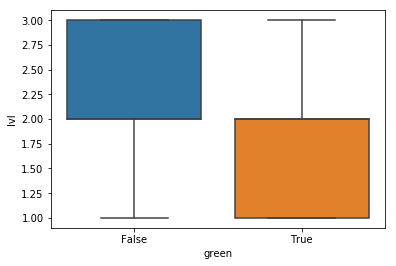

In [13]:
sns.boxplot(x='green',y='lvl',data=data2)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
# from jenkspy import jenks_breaks

In [56]:
# level_count = 4
# jenks_lvls = jenks_breaks(data2.score_mean.values, level_count)
# for i in range(0,level_count):
#     if i == level_count - 1:
#         data2.loc[(data2.score_mean >= jenks_lvls[i])&(data2.score_mean <= jenks_lvls[i+1]),'jenks_lvl'] = i+1
#     else:
#         data2.loc[(data2.score_mean >= jenks_lvls[i])&(data2.score_mean < jenks_lvls[i+1]),'jenks_lvl'] = i+1
# jenks_lvls

In [15]:
y = data2['lvl']
train_data = data2.drop(['id', 'lvl', 'stats_mean', 'stats_count','stats_median','stats_stdev','archi_nohouses',
                         'archi_unknown','archi_rev_after','archi_current'], axis=1)
# train_data.loc[train_data.nusers >= 10,'photos'] = 1
# train_data.loc[train_data.nusers <10,'photos'] = 0
# train_data = train_data.drop(['nusers'],axis=1)


In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66766 entries, 0 to 174290
Data columns (total 6 columns):
noise_lvl           66766 non-null int64
archi_rev_before    66766 non-null int64
nusers              66766 non-null int64
water               66766 non-null bool
dirty               66766 non-null bool
green               66766 non-null bool
dtypes: bool(3), int64(3)
memory usage: 4.7 MB


In [17]:
X_train, X_holdout, y_train, y_holdout = train_test_split(train_data, y, test_size=0.3, random_state=42)

##### Случайный лес

In [19]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_val_score
forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5)))
forest.fit(X_train, y_train)

0.6213195642659068


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [44]:
from sklearn.model_selection import GridSearchCV
forest_params = {
    'max_depth': range(1, 10),
    'max_features': range(1, train_data.shape[1]),
    # 'min_samples_leaf': range(1, 8)
}
forest_grid = GridSearchCV(forest, forest_params,cv=5, n_jobs=-1,verbose=True)
forest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  7.7min


[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  9.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 10), 'max_features': range(1, 6)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [45]:
forest_grid.best_params_, forest_grid.best_score_

({'max_depth': 8, 'max_features': 1}, 0.6244008901061281)

In [46]:
accuracy_score(y_holdout, forest_grid.predict(X_holdout))

0.6161757363954069

In [20]:
forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=17, 
                                max_features=1,
                                max_depth=8,
                                min_samples_leaf=1
                                )
forest.fit(X_train, y_train)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5)))

0.6238870682336437


In [48]:
from sklearn.metrics import *
report = classification_report(y_holdout, forest.predict(X_holdout))
print(report)

             precision    recall  f1-score   support

        1.0       0.70      0.58      0.63      6708
        2.0       0.57      0.63      0.60      8435
        3.0       0.61      0.65      0.63      4887

avg / total       0.62      0.62      0.62     20030



In [114]:
# from sklearn.ensemble import RandomForestClassifier
# forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=17, 
#                                 max_features=2,
#                                 max_depth=9,
#                                 min_samples_leaf=5)
# forest.fit(X_train, y_train)
# print(np.mean(cross_val_score(forest, X_train, y_train, cv=5)))

In [49]:
importances = forest.feature_importances_
print(importances)
std = np.std([forest.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

[0.27027058 0.17631611 0.27427659 0.0228855  0.05405444 0.20219677]


Feature ranking:
1. feature 2 (0.274277)
2. feature 0 (0.270271)
3. feature 5 (0.202197)
4. feature 1 (0.176316)
5. feature 4 (0.054054)
6. feature 3 (0.022886)


(-1, 6)

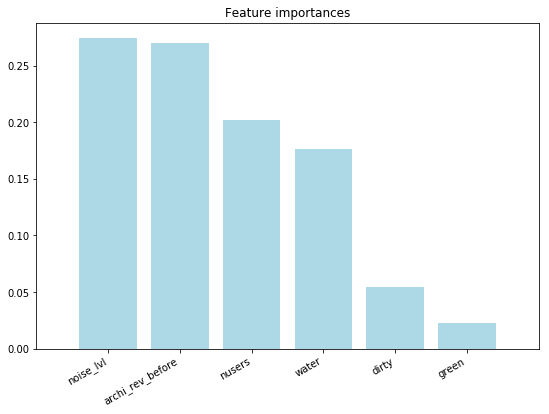

In [50]:
# Plot the feature importances of the forest
plt.figure(figsize=(9,6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="lightblue", yerr=std[indices], align="center")
feature_names = train_data.columns
plt.xticks(range(X_train.shape[1]), feature_names, rotation=30, ha='right')
plt.xlim([-1, X_train.shape[1]])
# plt.savefig('imgs/test2.png', dpi=300)

In [21]:
res_df = pd.DataFrame(columns=['id', 'forest_lvl'])
for i, row in data.iterrows():
    if divmod(i, 1000)[1] == 0:
        print('%s'%i)
    res_row = pd.Series({'id':row['id']})
    train_row = row.drop(['id','stats_stdev','stats_median','archi_nohouses',
                          'stats_mean','stats_count',
                          'archi_unknown','archi_rev_after','archi_current'])
    # res_row['tree_lvl'] = int(tree_grid.predict(train_row.reshape(1, -1))[0])
    res_row['forest_lvl'] = int(forest.predict(train_row.reshape(1, -1))[0])
    res_df = res_df.append(res_row, ignore_index=True)
res_df.to_csv('data/footways_exp3_predicted_3lvls.csv')

0


C:\Users\sasfeat\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


1000


2000


3000


4000


5000


6000


7000


8000


9000


10000


11000


12000


13000


14000


15000


16000


17000


18000


19000


20000


21000


22000


23000


24000


25000


26000


27000


28000


29000


30000


31000


32000


33000


34000


35000


36000


37000


38000


39000


40000


41000


42000


43000


44000


45000


46000


47000


48000


49000


50000


51000


52000


53000


54000


55000


56000


57000


58000


59000


60000


61000


62000


63000


64000


65000


66000


67000


68000


69000


70000


71000


72000


73000


74000


75000


76000


77000


78000


79000


80000


81000


82000


83000


84000


85000


86000


87000


88000


89000


90000


91000


92000


93000


94000


95000


96000


97000


98000


99000


100000


101000


102000


103000


104000


105000


106000


107000


108000


109000


110000


111000


112000


113000


114000


115000


116000


117000


118000


119000


120000


121000


122000


123000


124000


125000


126000


127000


128000


129000


130000


131000


132000


133000


134000


135000


136000


137000


138000


139000


140000


141000


142000


143000


144000


145000


146000


147000


148000


149000


150000


151000


152000


153000


154000


155000


156000


157000


158000


159000


160000


161000


162000


163000


164000


165000


166000


167000


168000


169000


170000


171000


172000


173000


174000


In [105]:
predicted = pd.read_csv('data/footways_predicted_3lvls.csv')
merged = pd.merge(data2, predicted, on='id')
for cls in sorted(data2['lvl'].unique()):
    fn = merged[(merged.lvl == int(cls)) & (merged.forest_lvl != int(cls))]
    # print(fn.head())
    print("FN of cls %d: %s percent " % (cls, round(fn.__len__() / merged.__len__() * 100,1)))
    other_cls = list(data2['lvl'].unique().copy())
    other_cls.remove(cls)
    for c in other_cls:
        
        print('%s percent of FN belongs to cls %d' % (round(fn[fn['forest_lvl'] == c].__len__() / fn.__len__() *100,1), c) )

FN of cls 1: 14.3 percent 
87.7 percent of FN belongs to cls 2
12.3 percent of FN belongs to cls 3
FN of cls 2: 15.1 percent 
48.2 percent of FN belongs to cls 3
51.8 percent of FN belongs to cls 1
FN of cls 3: 10.1 percent 
87.9 percent of FN belongs to cls 2
12.1 percent of FN belongs to cls 1


In [12]:
for lvl in sorted(data2['lvl'].unique()):
    
    print("cls %d: "%int(lvl), data2[data2['lvl']==int(lvl)]['stats_stdev'].mean(),data2[data2['lvl']==int(lvl)].__len__() )

cls 1:  0.6585813157333448 20454
cls 2:  1.0600351425279033 25213
cls 3:  0.7661342566312216 13963
